In [ ]:
#Load the data
import pandas as pd

# Read the CSV file from the URL
df = pd.read_csv("customers_churn.csv")

# Display the first few rows of the dataframe
print(df.head())


   CustomerID  Tenure  Monthly_Charges  Total_Charges   Contract_Type  \
0           1      29               33            957        One Year   
1           2      15               46            690  Month-to-Month   
2           3       8               28            224        Two Year   
3           4      21               98           2058  Month-to-Month   
4           5      19               34            646  Month-to-Month   

  Internet_Service  Support_Calls  Churn  
0              DSL              1      0  
1               No              5      0  
2      Fiber Optic              8      0  
3              DSL              7      1  
4      Fiber Optic              4      0  


In [ ]:
#Data preparation
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_contract = LabelEncoder()
df['Contract_Type'] = le_contract.fit_transform(df['Contract_Type'])
le_internet = LabelEncoder()
df['Internet_Service'] = le_internet.fit_transform(df['Internet_Service'])

# Remove missing values
df = df.dropna()


df

,CustomerID,Tenure,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Support_Calls,Churn
0,1,29,33,957,1,0,1,0
1,2,15,46,690,0,2,5,0
2,3,8,28,224,2,1,8,0
3,4,21,98,2058,0,0,7,1
4,5,19,34,646,0,1,4,0
...,...,...,...,...,...,...,...,...
95,96,35,90,3150,0,0,6,1
96,97,14,71,994,2,1,7,0
97,98,3,52,156,0,1,6,1
98,99,1,59,59,0,0,4,1


In [27]:
# Summary Statistics
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        CustomerID      Tenure  Monthly_Charges  Total_Charges  Contract_Type  \
count  100.000000  100.000000       100.000000     100.000000     100.000000   
mean    50.500000   17.450000        59.900000    1056.510000       0.900000   
std     29.011492   10.335166        23.654713     785.418894       0.834847   
min      1.000000    1.000000        20.000000      21.000000       0.000000   
25%     25.750000    8.000000        39.000000     455.500000       0.000000   
50%     50.500000   17.500000        61.000000     910.500000       1.000000   
75%     75.250000   25.000000        81.000000    1635.750000       2.000000   
max    100.000000   35.000000        99.000000    3366.000000       2.000000   

       Internet_Service  Support_Calls       Churn  
count        100.000000       100.0000  100.000000  
mean           1.050000         4.3700    0.280000  
std            0.770347         3.0506    0.451261  
min            0.000000         0.0000    0.00

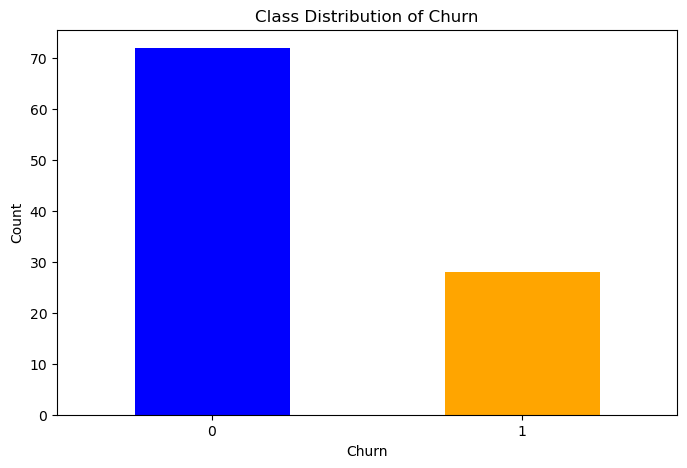

C:\Users\madio\AppData\Local\Temp\ipykernel_25188\4105959548.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn_rates = df.groupby("Tenure_Group")["Churn"].mean() * 100
C:\Users\madio\AppData\Local\Temp\ipykernel_25188\4105959548.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_charges_churn_rates = df.groupby("Monthly_Charges_Group")["Churn"].mean() * 100


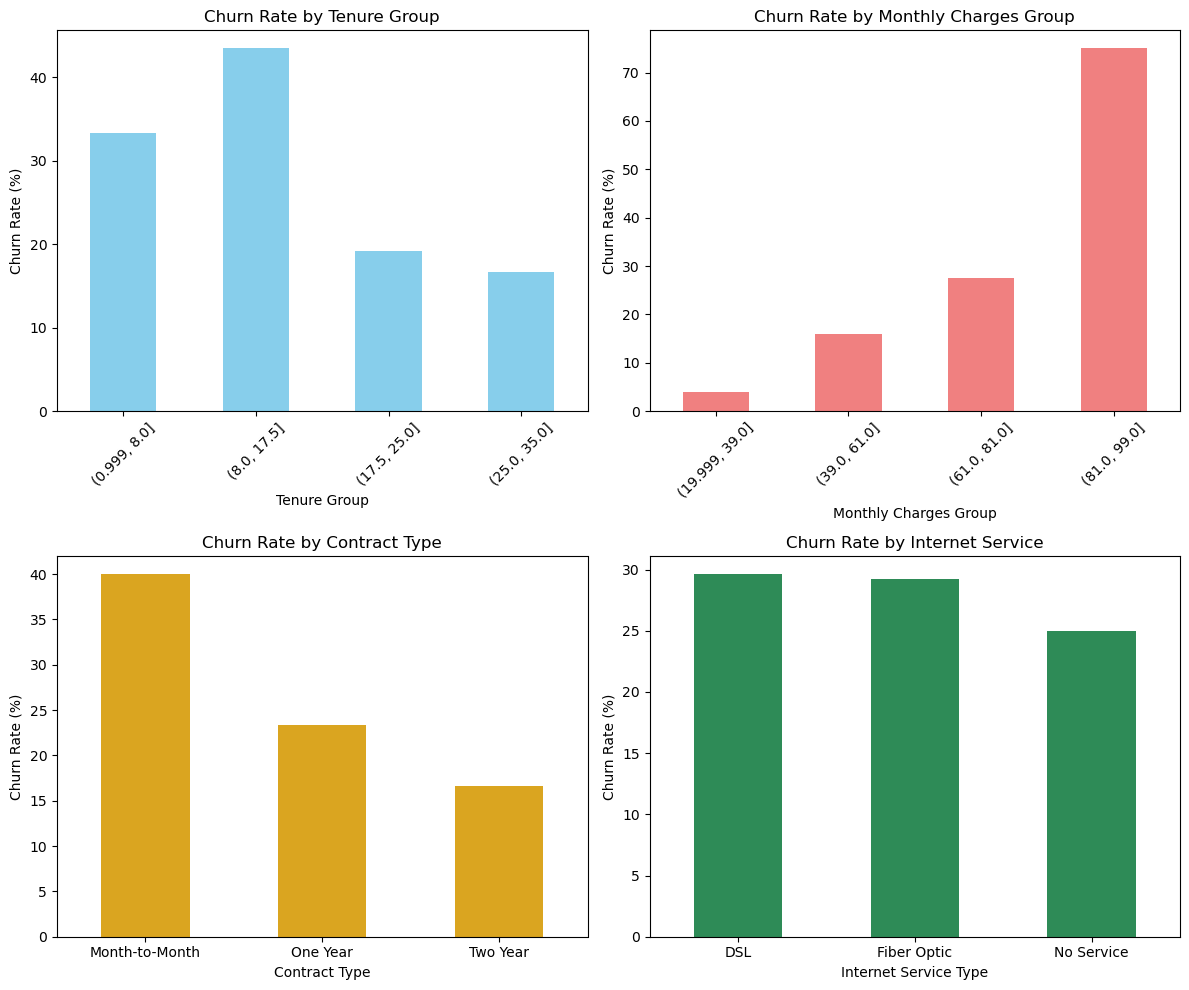

In [28]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

#Overall Churn
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Churn rate by Tenure (divided into quartiles)
df["Tenure_Group"] = pd.qcut(df["Tenure"], q=4)
tenure_churn_rates = df.groupby("Tenure_Group")["Churn"].mean() * 100

# Churn rate by Monthly Charges (divided into quartiles)
df["Monthly_Charges_Group"] = pd.qcut(df["Monthly_Charges"], q=4)
monthly_charges_churn_rates = df.groupby("Monthly_Charges_Group")["Churn"].mean() * 100

# Churn rate by Contract Type
contract_type_churn_rates = df.groupby("Contract_Type")["Churn"].mean() * 100

# Churn rate by Internet Service
internet_service_churn_rates = df.groupby("Internet_Service")["Churn"].mean() * 100

# Generate charts to visualize churn impact
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Churn Rate by Tenure Group
tenure_churn_rates.plot(kind='bar', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Churn Rate by Tenure Group')
axes[0, 0].set_xlabel('Tenure Group')
axes[0, 0].set_ylabel('Churn Rate (%)')
axes[0, 0].set_xticklabels(tenure_churn_rates.index, rotation=45)

# Churn Rate by Monthly Charges Group
monthly_charges_churn_rates.plot(kind='bar', color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Churn Rate by Monthly Charges Group')
axes[0, 1].set_xlabel('Monthly Charges Group')
axes[0, 1].set_ylabel('Churn Rate (%)')
axes[0, 1].set_xticklabels(monthly_charges_churn_rates.index, rotation=45)

# Churn Rate by Contract Type
contract_type_churn_rates.plot(kind='bar', color='goldenrod', ax=axes[1, 0])
axes[1, 0].set_title('Churn Rate by Contract Type')
axes[1, 0].set_xlabel('Contract Type')
axes[1, 0].set_ylabel('Churn Rate (%)')
axes[1, 0].set_xticklabels(['Month-to-Month', 'One Year', 'Two Year'], rotation=0)

# Churn Rate by Internet Service
internet_service_churn_rates.plot(kind='bar', color='seagreen', ax=axes[1, 1])
axes[1, 1].set_title('Churn Rate by Internet Service')
axes[1, 1].set_xlabel('Internet Service Type')
axes[1, 1].set_ylabel('Churn Rate (%)')
axes[1, 1].set_xticklabels(['DSL', 'Fiber Optic', 'No Service'], rotation=0)

plt.tight_layout()
plt.show()

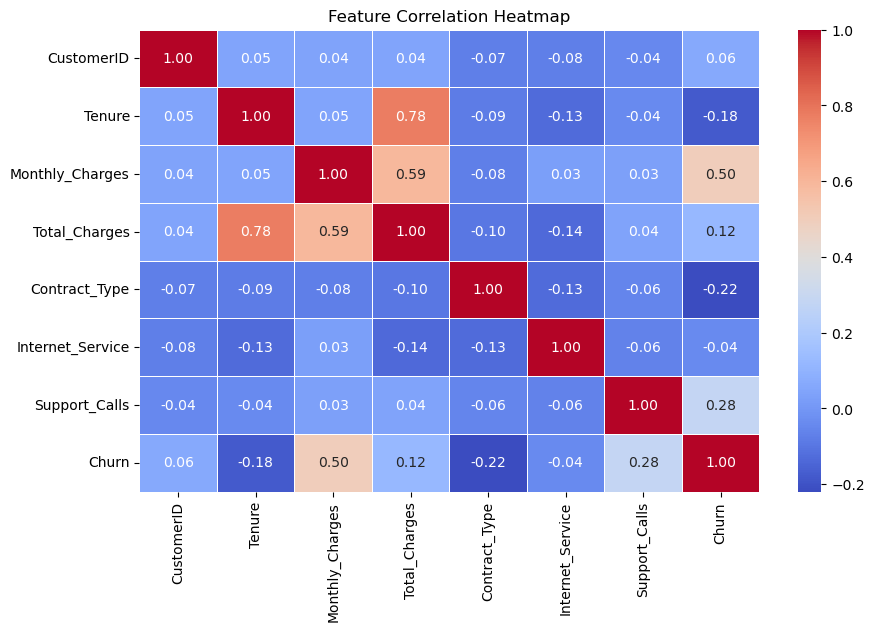

In [29]:
# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [30]:
# Standardize numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Tenure', 'Monthly_Charges', 'Total_Charges', 'Support_Calls']
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [31]:
# Train-test split

from sklearn.model_selection import train_test_split

features = ['Tenure', 'Monthly_Charges', 'Total_Charges', 'Contract_Type', 'Internet_Service', 'Support_Calls']
X = df[features]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [32]:
# Train logistic regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predictions
y_pred = model.predict(X_test)

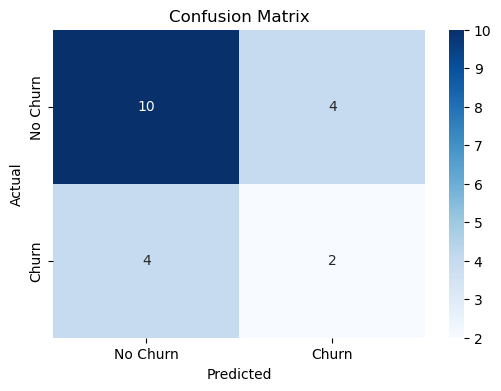

Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.33      0.33      0.33         6

    accuracy                           0.60        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.60      0.60      0.60        20



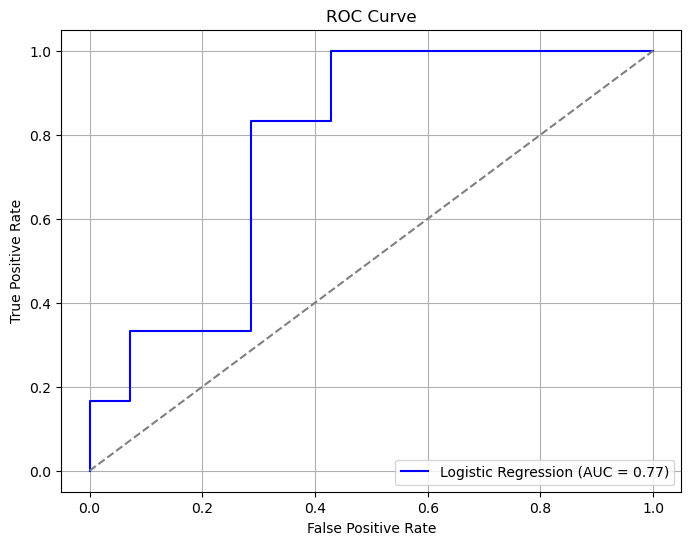

In [34]:
#Model evaluation

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Compute predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute ROC curve
auc_score = roc_auc_score(y_test, y_prob)  # Compute AUC score

# Plot ROC Curve with AUC annotation
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.legend()
plt.show()